# Best areas (zipcode) in New York City for Rental Properties Investment
—— by AirBnB & Zillow data 

Task description:
We have already known that two bedroom properties are the most profitable on short-term rentals in New York City. To further investigate which areas (zip codes) are the best to invest in, we use AirBnB and Zillow data as the references for Revenue and Cost, respectively. Below are some introductions about AirBnB and Zillow.

- **AirBnB：**
AirBnB operates an online marketplace and hospitality service. It allows people to lease or rent short-term lodging. Pricing is determined by the host, with recommendations from Airbnb. Hosts can charge different prices for nightly, weekly, and monthly stays and can make adjustments for seasonal pricing. It is the indicator of short-term revenue here in the project. <br>
(Wikipedia: https://en.wikipedia.org/wiki/Airbnb)

- **Zillow:**
Zillow determines an estimate ("Zestimate") for a home based on a range of publicly available information, including public data and sales of comparable houses in a neighborhood. It is the indicator of the cost here in the project. <br>
(Wikipedia: https://en.wikipedia.org/wiki/Zillow)

In [4]:
import pandas as pd
year, month, day = 2017, 5, 2
url = "http://data.insideairbnb.com/united-states/ny/new-york-city/2017-05-02/data/listings.csv.gz"
airbnb_data = pd.read_csv(url)  # load airbnb data here

/Users/shangguanshun/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
zillow_data = pd.read_csv('Zip_Zhvi_2bedroom.csv') # load zillow data here

In [6]:
zillow_data.head(4)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200


In [7]:
airbnb_data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN


## Price trend in one zipcode
for zipcode 60657 (regionname in zillow data), plot the two -bedroom median price as function of time to show the price trend for this zipcode. 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

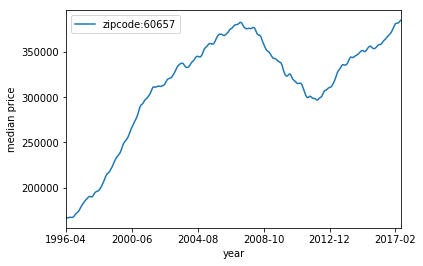

In [9]:
zillow_data = zillow_data.set_index('RegionName')
zillow_data.loc[60657][6:].plot(label = 'zipcode:60657')
plt.legend()
plt.xlabel('year')
plt.ylabel('median price')
plt.savefig('price_60657.png')

## Price trend plot function 
write a function to do Q1. given any zipcode, the function will display and save the price trend plot. Consider two issues:
- the zipcode may not exist in the data or wrong
- there are NA values in zillow price data for early years

In [10]:
def price_plot(zipcode):
    if zipcode in zillow_data.index:
        
        data = zillow_data.loc[zipcode][6:]
        plt.plot(data, label = 'zipcode:%5d'%zipcode)
        plt.legend()
        plt.xlabel('year')
        plt.xticks(('1996-04', '2000-06', '2004-08', '2008-10', '2012-12','2017-06'))
        plt.ylabel('median price')
        plt.savefig('price_%5d.png'%zipcode)
        
    else:
        return('this zipcode does not exist')

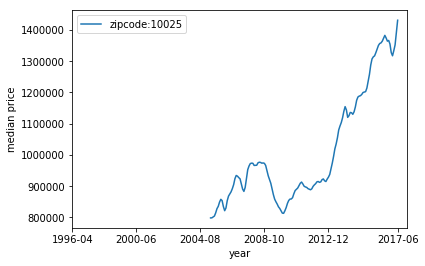

In [11]:
price_plot(10025)

## Explore the price of two room type
find the mean and median two bedroom airbnb price in New York city by room type (private room vs whole house). Make a barchart to show the comparison. Save the figure. find the percentage of private room listing in two-bedroom market. Based on the results we decide to consider only the whole house listing which is main type from now on.

In [12]:
airbnb_data = airbnb_data[airbnb_data['bedrooms'] == 2]

In [13]:
airbnb_data['price'] = airbnb_data['price'].str.replace(',','').str.replace('$','').astype('float')

/Users/shangguanshun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


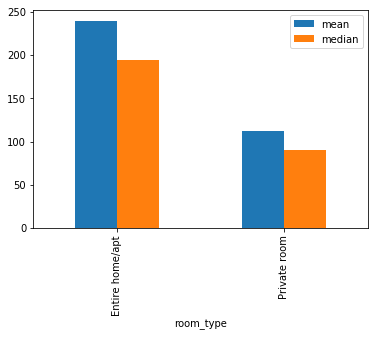

In [14]:
airbnb_data.groupby('room_type')['price'].agg(['mean','median']).plot(kind = 'bar')

In [15]:
room_type_percentage = airbnb_data.groupby('room_type')['price'].agg(['count'])
room_type_percentage['percentage'] = room_type_percentage['count']/room_type_percentage['count'].sum()

In [16]:
room_type_percentage

,count,percentage
room_type,,
Entire home/apt,4593,0.938496
Private room,301,0.061504


## Histogram plot of airbnb listing price of two-bedroom( only whole house)


In [17]:
airbnb_data = airbnb_data[airbnb_data.room_type == 'Entire home/apt']['price']

Text(0.5, 1.0, 'airbnb listing price of two bedroom with whole house')

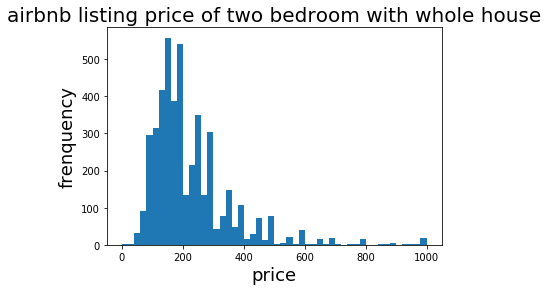

In [18]:
plt.hist(airbnb_data,bins = 50,range = (1,1000))
plt.xlabel('price',fontsize = 18)
plt.ylabel('frenquency',fontsize = 18)
plt.title('airbnb listing price of two bedroom with whole house',fontsize = 20)

## ROI 
calculate the mean and median airbnb listing price by zipcode. Assumea 75% occupancy rate. calculate  the return on investments.  
ROI = annual_rental_income / house_price

In [20]:
airbnb_data.zipcode.dropna(inplace = True)

In [21]:
airbnb_data.zipcode = airbnb_data.zipcode.str[:5]
airbnb_data = airbnb_data[airbnb_data.zipcode != '1m']

In [22]:
airbnb_data['price'] = airbnb_data['price'].str.replace(',','').str.replace('$','').astype('float')

/Users/shangguanshun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
annual_rental_income = airbnb_data.groupby(['zipcode'])['price'].agg(['mean','median'])

In [24]:
annual_rental_income['median'] = annual_rental_income['median'] * 0.75 * 365
annual_rental_income

,mean,median
zipcode,,
05340,650.000000,177937.500
07310,67.000000,18341.250
10001,228.497549,46400.625
10002,179.291465,35313.750
10003,207.898172,42978.750
10004,203.627119,47906.250
10005,188.145299,46263.750
10006,190.151515,43800.000
10007,395.968750,82125.000


In [26]:
zillow_data.set_index('RegionName',inplace = True)
zillow_data = zillow_data.loc[:,'2017-05']
zillow_data

RegionName
10025    1390000
60657     383300
10023    2095000
60614     412200
79936      83900
60640     254100
94109    1244400
77494     231300
32162     199100
60647     329900
37211     168500
37013     144100
60618     272700
10128    1720500
10011    2419700
28269     118800
77573     141200
30349      76400
90046    1017100
77584     157100
10003    2109100
60613     283400
78660     161100
75052     131000
20009     646800
20002     549200
21234     151300
63376     127000
30044     129200
60629     137500
          ...   
47640      70200
92333     222000
3605      139700
47968      74000
47597      69700
80515     247500
3282      134100
55781     213200
96148     448000
3457      203900
80456     212800
80510     278300
1255      213500
95497     721500
55053     254800
95728     393500
97149     388100
3279      120300
12480     120500
80481     354600
1270      158500
3812      155500
3215      161000
47965      69400
3765      115500
80532     285800
12429     153300
970

In [27]:
house_price = zillow_data.to_frame()
house_price.index.names = ['zipcode']

In [28]:
house_price.index = [str(x).zfill(5) for x in house_price.index]

In [29]:
ROI = annual_rental_income.join(house_price)

In [30]:
ROI = ROI[ROI['2017-05'].notnull()]
ROI['roi'] = ROI['median'] / ROI['2017-05']
ROI

,mean,median,2017-05,roi
zipcode,,,,
10003,207.898172,42978.750,2109100.0,0.020378
10011,219.656291,52012.500,2419700.0,0.021495
10013,255.228650,49275.000,3262200.0,0.015105
10014,235.090535,54750.000,2498400.0,0.021914
10021,182.880282,39693.750,1774100.0,0.022374
10022,221.086806,46537.500,1997800.0,0.023294
10023,209.870293,49275.000,2095000.0,0.023520
10025,162.038961,29017.500,1390000.0,0.020876
10028,162.383099,36135.000,2015700.0,0.017927


In [31]:
ROI.shape

(27, 4)

## Occupancy rates
Different zipcodes may have different occupancy rates. Develop a strategy to calculate the occupancy rate. Find the zip code that is most profitable.

In [32]:
start = 70
airbnb_data[airbnb_data.columns[start:start+5]].sample(5)

,has_availability,availability_30,availability_60,availability_90,availability_365
13546,NaN,6,7,26,272
20276,NaN,3,14,36,286
27117,NaN,7,14,28,235
25086,NaN,0,2,31,31
14213,NaN,26,56,86,361


In [33]:
occupancy_rate = (30 - airbnb_data.groupby('zipcode')['availability_30'].agg('mean'))/30

In [41]:
occupancy_rate.sort_values(ascending = False).head(10)

zipcode
10118    1.000000
11365    1.000000
10281    1.000000
10039    1.000000
10704    1.000000
07310    1.000000
11362    1.000000
11423    1.000000
11363    1.000000
10129    0.993333
Name: availability_30, dtype: float64

## Map for high ROI
Find some ways to display the map for hot areas (highest ROI) in New York city for real state developments. 

In [36]:
data_7 = pd.merge(airbnb_data[['zipcode','latitude','longitude']],
                   ROI[['roi']],
                   left_on = 'zipcode',
                   right_index = True,
                   how = 'inner')

In [37]:
data_7

,zipcode,latitude,longitude,roi
374,10312,40.551659,-74.168952,0.042810
375,10312,40.557685,-74.171556,0.042810
376,10312,40.551420,-74.169010,0.042810
377,10312,40.550734,-74.169052,0.042810
378,10312,40.551292,-74.169255,0.042810
379,10312,40.548637,-74.170486,0.042810
13042,10312,40.542680,-74.162537,0.042810
30002,10312,40.546331,-74.183701,0.042810
30003,10312,40.538836,-74.198262,0.042810
380,10305,40.592512,-74.064789,0.065023


In [38]:
data_7['ROI_level'] = pd.qcut(data_7['roi'],
                               q = [0,0.2,0.4,0.6,0.8,1],
                               labels = ['very low','low','medium','high','very high'])

Text(0, 0.5, 'longitude')

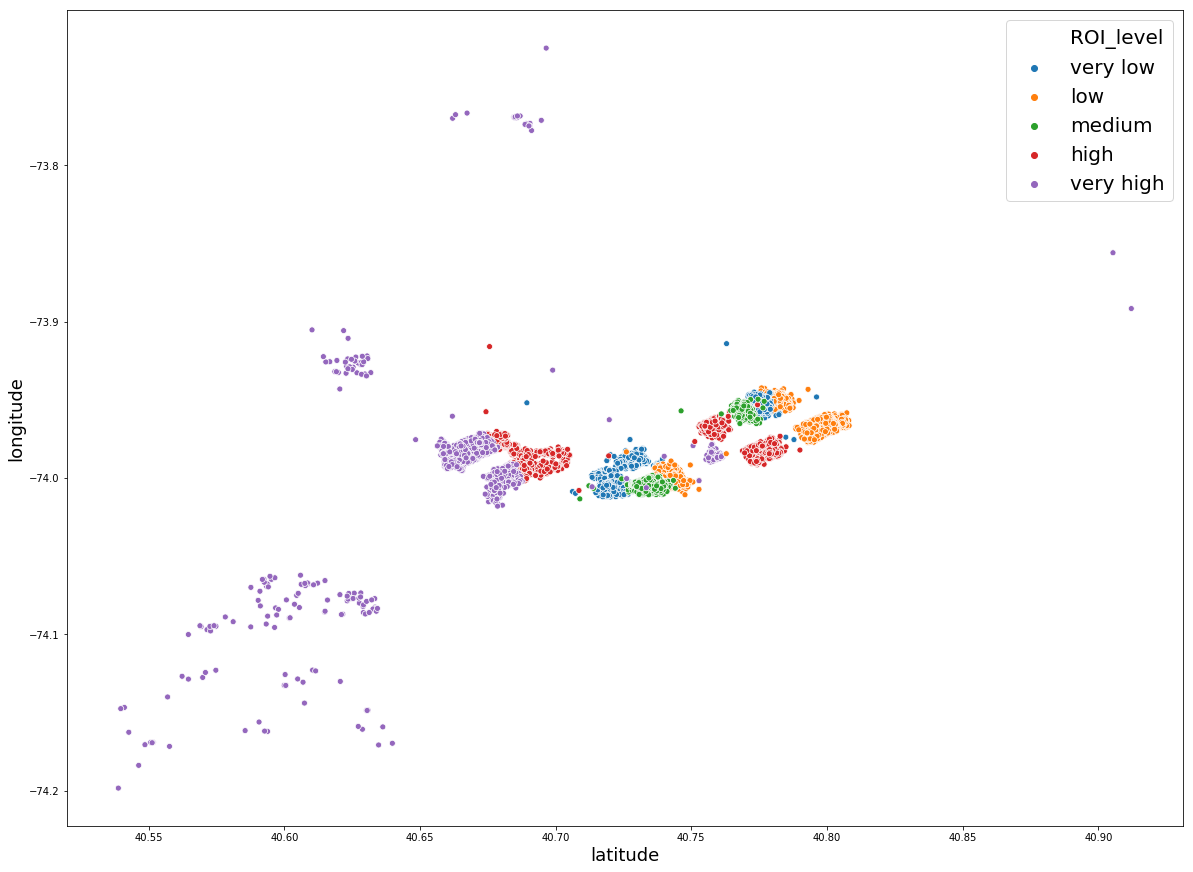

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
sns.scatterplot(x="latitude", y="longitude",
                     hue="ROI_level", data=data_7)
plt.legend(fontsize = 20)
plt.xlabel('latitude',fontsize = 18)
plt.ylabel('longitude',fontsize = 18)